### 3-1. 데이터의 이해
#### 데이터 리드(data lead)

In [6]:
import pandas as pd


# csv 파일 불러오기
dataframe = pd.read_csv("data/bank.csv")

# 처음부터 5행까지 표시
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


- 분석 목표: `계약 가능성이 높은 고객을 찾아내는 것`
- 데이터 구성: `한 행에 고객 한 명`의 데이터가 들어있다.<br>
고객마다 다음 항목(속성)이 있다.
    - age: 나이
    - job: 직업
    - marital: 결혼 이력
    - education: 학력
    - default: 채무 불이행 유무
    - balance: 연간 평균 잔고
    - housing: 주택 대출 유무
    - loan: 개인 대출 유무
    - contact: 연락 수단
    - day: 마지막으로 접촉한 날짜
    - month: 마지막으로 접촉한 달
    - duration: 접촉한 시간
    - campaign: 이번 캠페인으로 접촉한 횟수
    - pdays: 지난 번 캠페인에서 마지막으로 접촉한 후의 경과 시간
    - previous: 이번 캠페인 이전에 접촉한 횟수
    - poutcome: 지난 번 캠페인의 성공 유무
    - y: 예금 신청 유무

In [7]:
# 끝에서부터 10행 위까지 표시
dataframe.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [14]:
# 데이터의 행렬 수 파악
print(dataframe.shape)

(7234, 17)


In [13]:
# 파일 전체의 정보 표시
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


#### 결손값의 확인

In [18]:
# 데이터열에 결손값이 포함되어 있는가?
print(dataframe.isnull().any(axis=0))

# 데이터행에 결손값이 포함되어 있는가?
print(dataframe.isnull().any(axis=1))

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool
0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool


In [20]:
# 데이터 열별 결손값의 갯수
print(dataframe.isnull().sum(axis=0))

# 데이터 행별 결손값의 갯수
print(dataframe.isnull().sum(axis=1))

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64


In [27]:
# 데이터 행별 결손값의 갯수를 내림차순으로 정렬
dataframe.isnull().sum(axis=1).sort_values(ascending=False)

1837    4
1629    4
139     4
1814    4
1670    4
       ..
5919    0
5918    0
5917    0
5916    0
5379    0
Length: 7234, dtype: int64

#### 통계량의 계산

In [28]:
# 수치 데이터의 요약 정보
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [29]:
# 자료형이 문자열인 각종 통계량 계산
# unique: 원소 갯수, top: 최빈값, freq: 최빈값의 빈도수
dataframe.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


#### 데이터의 시각화

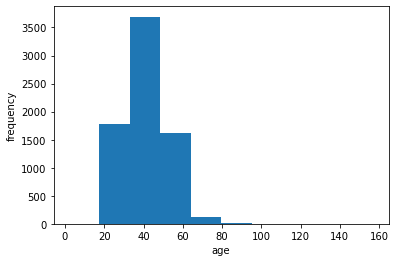

In [30]:
import matplotlib.pyplot as plt


# age 열의 히스토그램 작성
plt.hist(dataframe["age"])
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

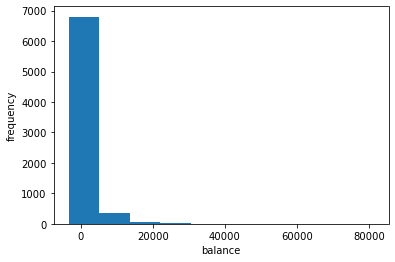

In [31]:
# balance 열의 히스토그램 작성
plt.hist(dataframe["balance"])
plt.xlabel("balance")
plt.ylabel("frequency")
plt.show()

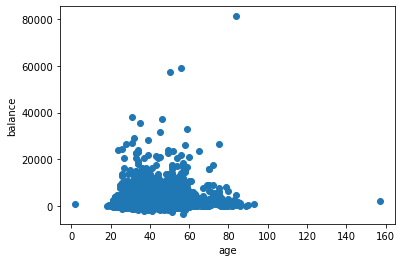

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [42]:
# age & balance 열의 산포도 작성
plt.scatter(dataframe["age"], dataframe["balance"])
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

# age & balance 열의 상호 관련성을 알아보기 위해 피어슨 상관계수를 사용
dataframe[["age", "balance"]].corr()

- 데이터를 분석할 때 상관에 관련된 `공선성(Collinearity)`에 대해서도 고려하지 않으면 안 된다.<br>
공선성은 변수(항목) 상호 간에 강하게 상관해 발생하는 문제이다.
- 공선성이 일으키는 문제에는 모델 작성에 관련된 계산량의 증대, 모델의 성능 저하, 모델의 불안정화 등이 있다.<br>
이와 같은 문제를 방지하려면 데이터 준비 단계에서 상관이 강한 변수를 제외하면 된다.<br>
또, 상관관계가 있어도 인과관계(원인과 결과)가 꼭 있다고 하기는 어렵다. 다음 세 개의 현상들은<br>
상관관계나 인과관계 중 어느 쪽일까?
    - 1. 키가 크면 체중이 증가한다.
    - 2. 파출소의 수가 많은 지역일수록 번죄 건수가 많다.
    - 3. 기온이 상승하면 맥주 판매가 늘어난다.
        - `1번`과 `3번`은 사상(사실과 현상) 간에 `상관관계`가 있으며, `2번`은 사상 간에 `인과관계`가 있다.<br>
        `2번`은 범죄 건수가 많은 지역이므로 치안 유지를 위해서 파출소가 많이 설치된, 다시 말해서<br>
        `파출소 수 -> 범죄건수`가 성립된다.
        - 이처럼 두 개의 사상 간에 `상관관계가 있어도 인과관계는 없는`<br>
        또는 `그 반대인(상관관계는 없지만 인과관계가 있는)` 경우도 있다.

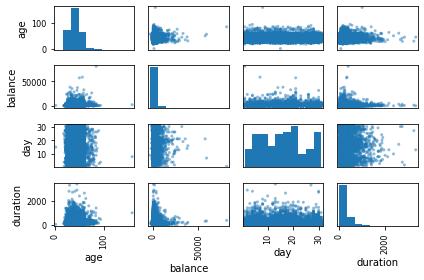

In [47]:
# 산포도 행렬
pd.plotting.scatter_matrix(dataframe[["age", "balance", "day", "duration"]])
plt.tight_layout()
plt.show()

In [48]:
# job 열에 해당하는 원소들의 비율 계산
dataframe["job"].value_counts(normalize=True, ascending=False)

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64

/Users/csh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  


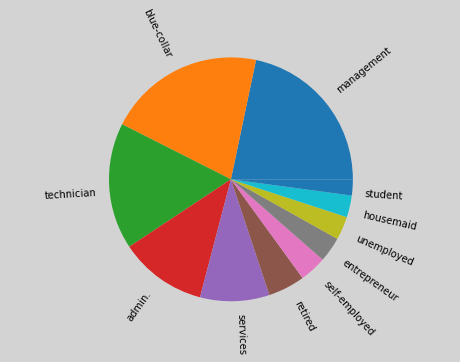

In [66]:
# job 열의 원소들의 레이블
job_labels = dataframe["job"].value_counts(normalize=True, ascending=False).index

# job 열의 원소들의 비율값
job_values = dataframe["job"].value_counts(normalize=True, ascending=False).values

plt.figure(figsize=(8, 5), facecolor="lightgray")
plt.pie(job_values, labels=job_labels, rotatelabels=True)
plt.axis("equal")
plt.show()

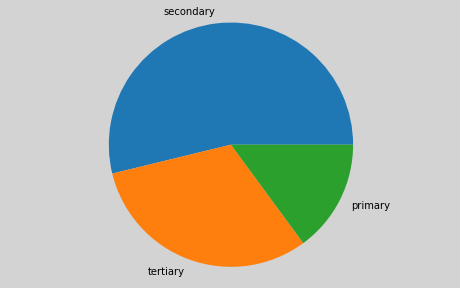

In [65]:
# education 열의 원소들의 레이블
education_labels = dataframe["education"].value_counts(normalize=True, ascending=False).index

# education 열의 원소들의 비율값
education_values = dataframe["education"].value_counts(normalize=True, ascending=False).values

plt.figure(figsize=(8, 5), facecolor="lightgray")
plt.pie(education_values, labels=education_labels)
plt.axis("equal")
plt.show()

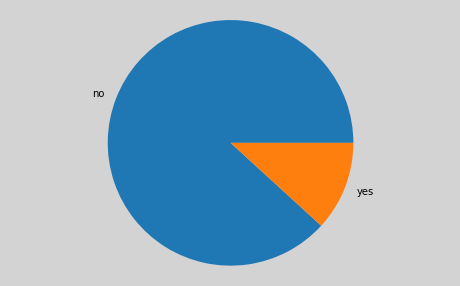

In [132]:
# 목적변수 y 열의 원소들의 레이블
y_labels = dataframe["y"].value_counts(normalize=True, ascending=False).index

# 목적변수 y 열의 원소들의 비율값
y_values = dataframe["y"].value_counts(normalize=True, ascending=False).values

plt.figure(figsize=(8, 5), facecolor="lightgray")
plt.pie(y_values, labels=y_labels)
plt.axis("equal")
plt.show()

#### 데이터의 시각화 2

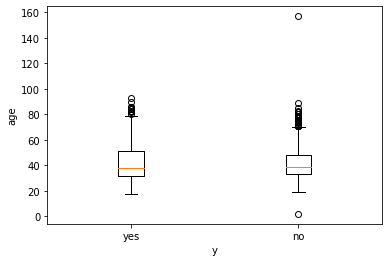

In [71]:
# y가 yes나 no 일때의 age 데이터를 추출
y_yes = dataframe[dataframe["y"] == "yes"]
y_no = dataframe[dataframe["y"] == "no"]
# yes or no 일때의 age 데이터를 리스트화
y_age = [y_yes["age"], y_no["age"]]

# 박스 수염 플롯
plt.boxplot(y_age)
plt.xlabel("y")
plt.ylabel("age")
ax = plt.gca()
plt.setp(ax, xticklabels = ["yes", "no"])
plt.show()

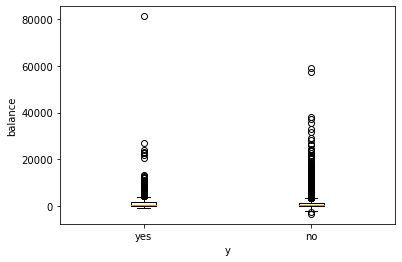

In [73]:
# y가 yes나 no 일때의 balance 데이터를 추출
y_yes = dataframe[dataframe["y"] == "yes"]
y_no = dataframe[dataframe["y"] == "no"]
# yes or no 일때의 balance 데이터를 리스트화
y_balance = [y_yes["balance"], y_no["balance"]]

# 박스 수염 플롯
plt.boxplot(y_balance)
plt.xlabel("y")
plt.ylabel("balance")
ax = plt.gca()
plt.setp(ax, xticklabels = ["yes", "no"])
plt.show()

### 3-2. 데이터의 준비
#### 데이터 불러오기

In [94]:
import pandas as pd


bank_data = pd.read_csv("data/bank.csv")

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [95]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


#### 결손값(nan) 제외

In [96]:
# job, education 열에 결손값이 포함되어 있는 행 삭제
bank_data = bank_data.dropna(subset=["job", "education"])
bank_data.shape

(6935, 17)

In [97]:
# poutcome 열을 데이터셋에서 제외
bank_data = bank_data.drop("poutcome", axis=1)
bank_data.shape

(6935, 16)

In [100]:
# 데이터 열별 결손값 존재 여부 확인
bank_data.isnull().any(axis=0)

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

In [101]:
# 결손값 갯수 확인
bank_data["contact"].isnull().sum()

1925

In [98]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,no


#### 결손값의 보완

In [102]:
# contact 열의 값의 형태 확인
bank_data["contact"].value_counts()

cellular     4549
telephone     461
Name: contact, dtype: int64

In [103]:
# 결손값을 "unknown"으로 치환
bank_data = bank_data.fillna({"contact":"unknown"})
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


#### 특이값(이상치)의 제외

In [109]:
# age가 18세 이상 100세 미만이 아닌 행을 삭제
bank_data = bank_data.query("age >= 18 and age < 100")
bank_data.shape

(6933, 16)

#### 문자열을 수치로 변환

In [111]:
# 데이터셋 전체에 걸쳐 값이 yes인 것을 1로, no를 0으로 치환
bank_data = bank_data.replace(["yes", "no"], [1, 0])
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0
3,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,-1,0,0
4,24,technician,single,secondary,0,-103,1,1,unknown,5,may,145,1,-1,0,0


In [112]:
# job 열을 get_dummies() 함수를 이용하여 one-hot 인코딩
bank_data_job = pd.get_dummies(bank_data["job"])
bank_data_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [113]:
# 나머지 항목 중 데이터형이 문자열인 것을 모두 더미 변수화
bank_data_marital = pd.get_dummies(bank_data["marital"])
bank_data_education = pd.get_dummies(bank_data["education"])
bank_data_contact = pd.get_dummies(bank_data["contact"])
bank_data_month = pd.get_dummies(bank_data["month"])

In [114]:
bank_data_marital.head()

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [115]:
bank_data_education.head()

,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [116]:
bank_data_contact.head()

,cellular,telephone,unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [117]:
bank_data_month.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [126]:
# 데이터셋에서 값이 수치로 이루어진 열을 추출
columns = bank_data.describe().columns
template = bank_data[columns]
template.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,36,0,265,1,1,5,348,1,-1,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0


In [127]:
# 수평결합
bank_data_new = pd.concat([
    template,
    bank_data_marital,
    bank_data_education,
    bank_data_contact,
    bank_data_month
    ], axis=1)
bank_data_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [128]:
# 결합된 열 확인
bank_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6933 entries, 0 to 7233
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        6933 non-null   int64
 1   default    6933 non-null   int64
 2   balance    6933 non-null   int64
 3   housing    6933 non-null   int64
 4   loan       6933 non-null   int64
 5   day        6933 non-null   int64
 6   duration   6933 non-null   int64
 7   campaign   6933 non-null   int64
 8   pdays      6933 non-null   int64
 9   previous   6933 non-null   int64
 10  y          6933 non-null   int64
 11  divorced   6933 non-null   uint8
 12  married    6933 non-null   uint8
 13  single     6933 non-null   uint8
 14  primary    6933 non-null   uint8
 15  secondary  6933 non-null   uint8
 16  tertiary   6933 non-null   uint8
 17  cellular   6933 non-null   uint8
 18  telephone  6933 non-null   uint8
 19  unknown    6933 non-null   uint8
 20  apr        6933 non-null   uint8
 21  aug        693

In [129]:
# 전처리한 결과를 csv 파일로 저장
bank_data_new.to_csv("data/bank_prep.csv", index=False)

### 3-3. 모델 작성
#### 데이터 불러오기

In [130]:
import pandas as pd


bank_data_new = pd.read_csv("data/bank_prep.csv")
bank_data_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


#### 불균형 데이터의 균형화
- 목적변수 y의 데이터 분포를 확인해 봤을 때, yes는 no보다 압도적으로 데이터 건수가 적다는 것을 알 수 있다.<br>
이대로 사용하면, no를 검출하는 모델 밖에 작성되지 않는다. 그래서 yes와 no의 데이터 건수가 균형을 이룰 수<br>
있도록 가공해야 한다.
- 데이터 건수의 균형을 맞추려면 "다수 클래스(no)의 데이터 건수를 소수 클래스(yes)의 데이터 건수와 같게 한다."<br>
라고 생각하면 간단하다. 다수 클래스의 데이터를 혼합(shuffle)하고 소수 클래스와 동일한 건수의 데이터를 선택하면<br>
된다. 이런 아이디어를 `언더 샘플링(Under Sampling)`이라고 한다.

In [150]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler


# 데이터셋을 설명변수(학습데이터)와 목적변수(레이블)로 분할
X = np.array(bank_data_new.drop("y", axis=1))
Y = np.array(bank_data_new["y"])

# y가 1과 0인 데이터 건수 카운트
print("y = 1: %d건, y = 0: %d건" %(np.sum(Y == 1), np.sum(Y == 0)))

# 언더샘플링
sampler = RandomUnderSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)
print("y = 1: %d건, y = 0: %d건" %(np.sum(Y == 1), np.sum(Y == 0)))

y = 1: 820건, y = 0: 6113건
y = 1: 820건, y = 0: 820건


#### 결정트리의 작성과 검증

In [163]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score


k_fold = KFold(10, shuffle=True)

scores = []

for train_id, test_id in k_fold.split(X):
    x = X[train_id]
    y = Y[train_id]
    model = tree.DecisionTreeClassifier()
    model.fit(x, y)
    
    y_predict = model.predict(X[test_id])
    
    score = accuracy_score(Y[test_id], y_predict)
    scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std())

0.7676829268292682 0.03528691779568364


In [167]:
# 모델의 재현율과 적합도 확인
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report


# print(recall_score(Y[test_id], y_predict))
# print(precision_score(Y[test_id], y_predict))
print(confusion_matrix(Y[test_id], y_predict))
print(classification_report(Y[test_id], y_predict))

[[64 16]
 [23 61]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        80
           1       0.79      0.73      0.76        84

    accuracy                           0.76       164
   macro avg       0.76      0.76      0.76       164
weighted avg       0.76      0.76      0.76       164



#### 모델의 정밀도 향상

In [168]:
from sklearn.model_selection import GridSearchCV


# parameter(매개변수) 범위 설정
params = {
    "criterion":["entropy"],
    "max_depth":[2, 4, 6, 8, 10],
    "min_samples_leaf":[10, 20, 30, 40, 50]
}

# grid search의 실행 조건을 설정
model_gs = GridSearchCV(tree.DecisionTreeClassifier(), params,
                        cv=KFold(10, shuffle=True), scoring="accuracy")

# grid search 실행
model_gs.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [169]:
# 가장 높은 정밀도와 파라미터의 조합을 표시
print(model_gs.best_score_)
print(model_gs.best_params_)

0.7914634146341464
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


In [170]:
# 최적의 파라미터를 사용한 모델을 작성
model_best = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=20)
model_best.fit(X, Y)

print(model_best.feature_importances_)

[0.01496426 0.         0.04445663 0.09824143 0.01612625 0.04122284
 0.54403349 0.00916479 0.06541295 0.03981101 0.         0.00558156
 0.         0.         0.00303882 0.         0.         0.
 0.07026309 0.         0.01300379 0.         0.         0.
 0.00349388 0.         0.         0.0311852  0.         0.
 0.        ]


#### 변수의 영향도 목록(TOP 5)
- duration: 0.54403349
- housing: 0.09824143
- telephone: 0.07026309
- pdays: 0.06541295
- balance: 0.04445663

In [178]:
bank_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6933 entries, 0 to 6932
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        6933 non-null   int64
 1   default    6933 non-null   int64
 2   balance    6933 non-null   int64
 3   housing    6933 non-null   int64
 4   loan       6933 non-null   int64
 5   day        6933 non-null   int64
 6   duration   6933 non-null   int64
 7   campaign   6933 non-null   int64
 8   pdays      6933 non-null   int64
 9   previous   6933 non-null   int64
 10  y          6933 non-null   int64
 11  divorced   6933 non-null   int64
 12  married    6933 non-null   int64
 13  single     6933 non-null   int64
 14  primary    6933 non-null   int64
 15  secondary  6933 non-null   int64
 16  tertiary   6933 non-null   int64
 17  cellular   6933 non-null   int64
 18  telephone  6933 non-null   int64
 19  unknown    6933 non-null   int64
 20  apr        6933 non-null   int64
 21  aug        693

### 3-4. 다시 데이터 준비로
#### 데이터 불러오기

In [231]:
import pandas as pd


bank_data = pd.read_csv("data/bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [232]:
print(bank_data.shape)

# 결손값 제외
bank_data.dropna(subset=["job", "education"], inplace=True)
print(bank_data.shape)

bank_data.dropna(thresh=2400, axis=1, inplace=True)
print(bank_data.shape)

# 결손값 보완
bank_data.fillna({"contact":"unknown"}, inplace=True)

# 이상치 제외
bank_data.query("age >= 18 and age < 100", inplace=True)
print(bank_data.shape)

(7234, 17)
(6935, 17)
(6935, 16)
(6933, 16)


In [233]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no
5,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,no
6,55,technician,married,secondary,no,1205,yes,no,unknown,5,may,158,2,-1,0,no
7,54,management,married,secondary,no,282,yes,yes,unknown,5,may,154,1,-1,0,no
8,55,services,divorced,secondary,no,91,no,no,unknown,5,may,349,1,-1,0,no
9,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes


In [234]:
bank_data.isnull().any(axis=0)

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

#### 문자열 값을 통합

In [235]:
# loc 함수를 사용하여 job이 "retired"가 아닌 값들을 "worker"로 치환하고, 새로운 열 job2에 저장한다.
bank_data.loc[(bank_data["job"] != "retired") |
              (bank_data["job"] != "unemployed") |
              (bank_data["job"] != "student"), "job2"] = "worker"

bank_data.loc[(bank_data["job"] == "retired") |
              (bank_data["job"] == "unemployed") |
              (bank_data["job"] == "student"), "job2"] = "non-worker"
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,worker
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no,worker
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no,worker
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no,worker
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no,worker
5,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,no,non-worker
6,55,technician,married,secondary,no,1205,yes,no,unknown,5,may,158,2,-1,0,no,worker
7,54,management,married,secondary,no,282,yes,yes,unknown,5,may,154,1,-1,0,no,worker
8,55,services,divorced,secondary,no,91,no,no,unknown,5,may,349,1,-1,0,no,worker
9,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes,worker


In [244]:
# loc 함수를 사용하여 month열의 데이터를 4사분기로 나누어 각 분기마다 "1Q"~"4Q"로 치환하고,
# 새로운 열 month2에 저장한다.
bank_data.loc[(bank_data["month"] == "jan") |
              (bank_data["month"] == "feb") |
              (bank_data["month"] == "mar"), "month2"] = "1Q"
bank_data.loc[(bank_data["month"] == "apr") |
              (bank_data["month"] == "may") |
              (bank_data["month"] == "jun"), "month2"] = "2Q"
bank_data.loc[(bank_data["month"] == "jul") |
              (bank_data["month"] == "aug") |
              (bank_data["month"] == "sep"), "month2"] = "3Q"
bank_data.loc[(bank_data["month"] == "oct") |
              (bank_data["month"] == "nov") |
              (bank_data["month"] == "dec"), "month2"] = "4Q"
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2,month2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,worker,2Q
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no,worker,2Q
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no,worker,2Q
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no,worker,2Q
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no,worker,2Q
5,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,no,non-worker,2Q
6,55,technician,married,secondary,no,1205,yes,no,unknown,5,may,158,2,-1,0,no,worker,2Q
7,54,management,married,secondary,no,282,yes,yes,unknown,5,may,154,1,-1,0,no,worker,2Q
8,55,services,divorced,secondary,no,91,no,no,unknown,5,may,349,1,-1,0,no,worker,2Q
9,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes,worker,2Q


In [258]:
# 값의 통합이 잘 이루어졌는지 확인
print(bank_data["month2"].value_counts())

print("1Q:", len(bank_data.query("month in ['jan','feb','mar']")))
print("2Q:", len(bank_data.query("month in ['apr','may','jun']")))
print("3Q:", len(bank_data.query("month in ['jul','aug','sep']")))
print("4Q:", len(bank_data.query("month in ['oct','nov','dec']")))

2Q    3305
3Q    2109
4Q     797
1Q     722
Name: month2, dtype: int64
1Q: 722
2Q: 3305
3Q: 2109
4Q: 797


#### 수치의 통합

In [260]:
# day가 10일 이하이면 "early", 10일 후 20일 이내라면 "middle", 20일 이후라면 "late"로 치환하고
# 새로운 열 day2에 저장한다.
bank_data.loc[bank_data["day"] <= 10, "day2"] = "early"
bank_data.loc[(bank_data["day"] > 10) & (bank_data["day"] <= 20), "day2"] = "middle"
bank_data.loc[bank_data["day"] > 20, "day2"] = "late"
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2,month2,day2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,worker,2Q,early
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no,worker,2Q,early
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no,worker,2Q,early
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no,worker,2Q,early
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no,worker,2Q,early
5,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,no,non-worker,2Q,early
6,55,technician,married,secondary,no,1205,yes,no,unknown,5,may,158,2,-1,0,no,worker,2Q,early
7,54,management,married,secondary,no,282,yes,yes,unknown,5,may,154,1,-1,0,no,worker,2Q,early
8,55,services,divorced,secondary,no,91,no,no,unknown,5,may,349,1,-1,0,no,worker,2Q,early
9,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes,worker,2Q,early


In [262]:
bank_data["day2"].value_counts()

middle    2842
early     2167
late      1924
Name: day2, dtype: int64

In [263]:
# duration에는 통화시간(초)이 들어 있다. 경계값을 설정하고 경계값을 기준으로 "short" or "long"
# 으로 치환하여 새로운 열 duration2에 저장한다.
bank_data.loc[bank_data["duration"] < 300, "duration2"] = "short"
bank_data.loc[bank_data["duration"] >= 300, "duration2"] = "long"
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2,month2,day2,duration2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,worker,2Q,early,short
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no,worker,2Q,early,long
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no,worker,2Q,early,long
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no,worker,2Q,early,long
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no,worker,2Q,early,short
5,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,no,non-worker,2Q,early,long
6,55,technician,married,secondary,no,1205,yes,no,unknown,5,may,158,2,-1,0,no,worker,2Q,early,short
7,54,management,married,secondary,no,282,yes,yes,unknown,5,may,154,1,-1,0,no,worker,2Q,early,short
8,55,services,divorced,secondary,no,91,no,no,unknown,5,may,349,1,-1,0,no,worker,2Q,early,long
9,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes,worker,2Q,early,long


In [264]:
# previous는 연락 횟수를 의미한다. 연락 횟수 1회를 기준으로 "zero" or "one-more"로 치환하고,
# 새로운 열 previous2에 저장한다.
bank_data.loc[bank_data["previous"] < 1, "previous2"] = "zero"
bank_data.loc[bank_data["previous"] >= 1, "previous2"] = "one-more"
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,y,job2,month2,day2,duration2,previous2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,no,worker,2Q,early,short,zero
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,...,348,1,-1,0,no,worker,2Q,early,long,zero
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,...,365,1,-1,0,no,worker,2Q,early,long,zero
3,53,technician,married,secondary,no,-3,no,no,unknown,5,...,1666,1,-1,0,no,worker,2Q,early,long,zero
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,...,145,1,-1,0,no,worker,2Q,early,short,zero
5,60,retired,married,tertiary,no,100,no,no,unknown,5,...,528,1,-1,0,no,non-worker,2Q,early,long,zero
6,55,technician,married,secondary,no,1205,yes,no,unknown,5,...,158,2,-1,0,no,worker,2Q,early,short,zero
7,54,management,married,secondary,no,282,yes,yes,unknown,5,...,154,1,-1,0,no,worker,2Q,early,short,zero
8,55,services,divorced,secondary,no,91,no,no,unknown,5,...,349,1,-1,0,no,worker,2Q,early,long,zero
9,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,yes,worker,2Q,early,long,zero


In [265]:
bank_data["previous2"].value_counts()

zero        5643
one-more    1290
Name: previous2, dtype: int64

In [266]:
# pdays는 이전 캠페인 실시 후로부터의 일수를 의미한다. 경계값을 0으로 설정하고, "less" or "more"로 치환하여
# 새로운 열 pdays2에 저장한다.
bank_data.loc[bank_data["pdays"] < 0, "pdays2"] = "less"
bank_data.loc[bank_data["pdays"] >= 0, "pdays2"] = "more"
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,y,job2,month2,day2,duration2,previous2,pdays2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,no,worker,2Q,early,short,zero,less
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
3,53,technician,married,secondary,no,-3,no,no,unknown,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,...,1,-1,0,no,worker,2Q,early,short,zero,less
5,60,retired,married,tertiary,no,100,no,no,unknown,5,...,1,-1,0,no,non-worker,2Q,early,long,zero,less
6,55,technician,married,secondary,no,1205,yes,no,unknown,5,...,2,-1,0,no,worker,2Q,early,short,zero,less
7,54,management,married,secondary,no,282,yes,yes,unknown,5,...,1,-1,0,no,worker,2Q,early,short,zero,less
8,55,services,divorced,secondary,no,91,no,no,unknown,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
9,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1,-1,0,yes,worker,2Q,early,long,zero,less


In [286]:
bank_data["pdays2"].value_counts()

less    5643
more    1290
Name: pdays2, dtype: int64

In [287]:
# 데이터셋 전체에 걸쳐 값이 yes인 것을 1로, no를 0으로 치환
bank_data = bank_data.replace(["yes", "no"], [1, 0])
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,y,job2,month2,day2,duration2,previous2,pdays2
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,1,-1,0,0,worker,2Q,early,short,zero,less
1,36,technician,single,secondary,0,265,1,1,unknown,5,...,1,-1,0,0,worker,2Q,early,long,zero,less
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,...,1,-1,0,0,worker,2Q,early,long,zero,less
3,53,technician,married,secondary,0,-3,0,0,unknown,5,...,1,-1,0,0,worker,2Q,early,long,zero,less
4,24,technician,single,secondary,0,-103,1,1,unknown,5,...,1,-1,0,0,worker,2Q,early,short,zero,less


In [288]:
# 나머지 항목 중 데이터형이 문자열인 것을 모두 더미 변수화
bank_data_job = pd.get_dummies(bank_data["job"])
bank_data_marital = pd.get_dummies(bank_data["marital"])
bank_data_education = pd.get_dummies(bank_data["education"])
bank_data_contact = pd.get_dummies(bank_data["contact"])
bank_data_month = pd.get_dummies(bank_data["month"])

In [289]:
# 데이터셋에서 값이 수치로 이루어진 열을 추출
columns = bank_data.describe().columns
template = bank_data[columns]
template.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,36,0,265,1,1,5,348,1,-1,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0


In [290]:
# 수평결합
bank_data_new = pd.concat([
    template,
    bank_data_marital,
    bank_data_education,
    bank_data_contact,
    bank_data_month
    ], axis=1)
bank_data_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [291]:
# 지금까지 신규로 작성한 변수를 원 핫 인코딩을 하여 3-2에서 만든 데이터셋에 삽입한다.
bank_data_job2 = pd.get_dummies(bank_data["job2"])
bank_data_month2 = pd.get_dummies(bank_data["month2"])
bank_data_day2 = pd.get_dummies(bank_data["day2"])
bank_data_duration2 = pd.get_dummies(bank_data["duration2"])
bank_data_previous2 = pd.get_dummies(bank_data["previous2"])
bank_data_pdays2 = pd.get_dummies(bank_data["pdays2"])

In [292]:
bank_data_job2.head()

,non-worker,worker
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [293]:
bank_data_month2.head()

,1Q,2Q,3Q,4Q
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [294]:
bank_data_day2.head()

,early,late,middle
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [295]:
bank_data_duration2.head()

,long,short
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [296]:
bank_data_previous2.head()

,one-more,zero
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [297]:
bank_data_pdays2.head()

,less,more
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [298]:
# 수평결합
bank_data_new2 = pd.concat([bank_data_new,
                            bank_data_job2,
                            bank_data_month2,
                            bank_data_day2,
                            bank_data_duration2,
                            bank_data_previous2,
                            bank_data_pdays2], axis=1)
bank_data_new2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,4Q,early,late,middle,long,short,one-more,zero,less,more
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,1,0,1,1,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,1,0,0,0,1,0,1,1,0


In [301]:
# 결합된 열 확인
bank_data_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6933 entries, 0 to 7233
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         6933 non-null   int64
 1   default     6933 non-null   int64
 2   balance     6933 non-null   int64
 3   housing     6933 non-null   int64
 4   loan        6933 non-null   int64
 5   day         6933 non-null   int64
 6   duration    6933 non-null   int64
 7   campaign    6933 non-null   int64
 8   pdays       6933 non-null   int64
 9   previous    6933 non-null   int64
 10  y           6933 non-null   int64
 11  divorced    6933 non-null   uint8
 12  married     6933 non-null   uint8
 13  single      6933 non-null   uint8
 14  primary     6933 non-null   uint8
 15  secondary   6933 non-null   uint8
 16  tertiary    6933 non-null   uint8
 17  cellular    6933 non-null   uint8
 18  telephone   6933 non-null   uint8
 19  unknown     6933 non-null   uint8
 20  apr         6933 non-null   ui

In [304]:
# 전처리한 결과를 csv파일로 저장
bank_data_new2.to_csv("data/bank_prep2.csv", index=False)

### 3-5. 다시 한번 모델 작성
#### 데이터 불러오기

In [305]:
import pandas as pd


bank_data_new2 = pd.read_csv("data/bank_prep2.csv")
bank_data_new2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,4Q,early,late,middle,long,short,one-more,zero,less,more
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,1,0,1,1,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,1,0,0,0,1,0,1,1,0


#### 불균형 데이터 균등화

In [306]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler


# 데이터셋을 설명변수(학습데이터)와 목적변수(레이블)로 분할
X = np.array(bank_data_new2.drop("y", axis=1))
Y = np.array(bank_data_new2["y"])

# y가 1과 0인 데이터 건수 카운트
print("y = 1: %d건, y = 0: %d건" %(np.sum(Y == 1), np.sum(Y == 0)))

# 언더샘플링
sampler = RandomUnderSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)
print("y = 1: %d건, y = 0: %d건" %(np.sum(Y == 1), np.sum(Y == 0)))

y = 1: 820건, y = 0: 6113건
y = 1: 820건, y = 0: 820건


#### 영향력 TOP 5 변수 선택

In [326]:
from sklearn.feature_selection import SelectKBest


# 특징량 TOP 5를 선택
selector = SelectKBest(k=5)
selector.fit(X, Y)
mask = selector.get_support()

# 어떤 변수를 선택하였는지 확인
print(bank_data_new2.drop("y", axis=1).columns)
print(mask)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'divorced', 'married', 'single',
       'primary', 'secondary', 'tertiary', 'cellular', 'telephone', 'unknown',
       'apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'non-worker', 'worker', '1Q', '2Q', '3Q', '4Q', 'early',
       'late', 'middle', 'long', 'short', 'one-more', 'zero', 'less', 'more'],
      dtype='object')
[False False False  True False False  True False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False]


In [327]:
# 선택된 특징량의 열만 취득
X_top5 = selector.transform(X)
X_top5

array([[  1,  79,   0,   0,   1],
       [  1,  70,   1,   0,   1],
       [  0, 108,   0,   0,   1],
       ...,
       [  0, 357,   0,   1,   0],
       [  0, 449,   0,   1,   0],
       [  0, 386,   0,   1,   0]])

#### TOP 5 변수만으로 모델 검증

In [328]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score


k_fold = KFold(10, shuffle=True)

scores = []

for train_id, test_id in k_fold.split(X_top5):
    x = X_top5[train_id]
    y = Y[train_id]
    model = tree.DecisionTreeClassifier()
    model.fit(x, y)
    
    y_predict = model.predict(X_top5[test_id])
    
    score = accuracy_score(Y[test_id], y_predict)
    scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std())

0.7152439024390244 0.02499999999999999


In [329]:
# 모델의 재현율과 적합도 확인
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report


# print(recall_score(Y[test_id], y_predict))
# print(precision_score(Y[test_id], y_predict))
print(confusion_matrix(Y[test_id], y_predict))
print(classification_report(Y[test_id], y_predict))

[[59 19]
 [28 58]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        78
           1       0.75      0.67      0.71        86

    accuracy                           0.71       164
   macro avg       0.72      0.72      0.71       164
weighted avg       0.72      0.71      0.71       164



#### 모델의 정밀도 향상

In [330]:
from sklearn.model_selection import GridSearchCV


# parameter(매개변수) 범위 설정
params = {
    "criterion":["entropy"],
    "max_depth":[2, 4, 6, 8, 10],
    "min_samples_leaf":[10, 20, 30, 40, 50]
}

# grid search의 실행 조건을 설정
model_gs = GridSearchCV(tree.DecisionTreeClassifier(), params,
                        cv=KFold(10, shuffle=True), scoring="accuracy")

# grid search 실행
model_gs.fit(X_top5, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [332]:
# 가장 높은 정밀도와 파라미터의 조합을 표시
print(model_gs.best_score_)
print(model_gs.best_params_)

0.8
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 20}


### 4-1. 타겟(고객)의 특성을 알자
#### 데이터 불러오기

In [335]:
import pandas as pd


bank_data = pd.read_csv("data/bank_prep.csv")
bank_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [336]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6933 entries, 0 to 6932
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        6933 non-null   int64
 1   default    6933 non-null   int64
 2   balance    6933 non-null   int64
 3   housing    6933 non-null   int64
 4   loan       6933 non-null   int64
 5   day        6933 non-null   int64
 6   duration   6933 non-null   int64
 7   campaign   6933 non-null   int64
 8   pdays      6933 non-null   int64
 9   previous   6933 non-null   int64
 10  y          6933 non-null   int64
 11  divorced   6933 non-null   int64
 12  married    6933 non-null   int64
 13  single     6933 non-null   int64
 14  primary    6933 non-null   int64
 15  secondary  6933 non-null   int64
 16  tertiary   6933 non-null   int64
 17  cellular   6933 non-null   int64
 18  telephone  6933 non-null   int64
 19  unknown    6933 non-null   int64
 20  apr        6933 non-null   int64
 21  aug        693

#### 데이터의 정규화(범위 변환, Z변환)

In [337]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 데이터셋에서 목적변수(y)를 제외
bank_data = bank_data.drop("y", axis=1)

# 범위변환 인스턴스 생성
scaler = MinMaxScaler()
scaler.fit(bank_data)

# 데이터셋에 범위변환 적용
bank_data_minmax = pd.DataFrame(scaler.transform(bank_data), columns=bank_data.columns)
bank_data_minmax.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [339]:
# Z변환 인스턴스 생성
scaler = StandardScaler()
scaler.fit(bank_data)

# 데이터셋에 Z변환 적용
bank_data_standard = pd.DataFrame(scaler.transform(bank_data), columns=bank_data.columns)
bank_data_standard.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [367]:
# Z변환한 각 항목의 평균과 표준편차 확인
print(bank_data_standard.mean().mean())
print(bank_data_standard.std().mean())

-7.376947277233871e-16
1.0000721266545103


### 4-2. 고객의 그룹화
- 데이터를 군집화 하려면 군집화의 기법, 데이터 간의 거리 함수, 군집의 병합 방법을 생각해 놓아야 한다.
- 군집화 기법에는 크게 두가지로 나뉜다.
    - `1. 계층형 클러스터링`
    - `2. 비계층형 클러스터링`: 일반적으로 이 기법이 자주 쓰인다.
- 군집은 데이터 간의 거리가 가까운 것들이 모여서 형성된다. 그런데 이들 데이터가 가까운지 아닌지를 어떻게<br>
측정하느냐가 다음 단계인데, 데이터 사이에는 스케일과 같은 여러 요소가 포함되어 있기 때문에 단순하게 비교하기는<br>
어렵다. 그래서 데이터 간의 거리 측정에 사용하는 대표적인 거리 함수 세 가지가 있다.
    - `1. 유클리드 거리(Euclidean Distance)`: 점(데이터1)과 점(데이터2) 사이의 직선거리(최단거리)를<br>
    피타고라스의 정리로 계산한다.(i.e., 물리용어중 변위에 해당한다.)
    - `2. 맨해튼 거리(Manhattan Distance)`: 점(데이터1)에서 점(데이터2)로 축을 따라서 진행했을 때의<br>
    경로 길이로 계산한다.(i.e., 물리용어중 이동거리에 해당한다.)
    - `3. 코사인 유사도(Cosine Similarity)`: 변수에 포함되는 값이 어느 정도 닮아 있는지, 즉 유사도를<br>
    나타낸다. 문서를 분류할 때 자주 사용되며, 두 데이터간의 유사도는 두 개의 벡터 각도에 의해 결정된다.<br>
    두 데이터 간의 각도가 작을수록 내용이 비슷하며, 반대로 각도가 클수록 내용이 다르게 볼 수 있다.
#### 계층적 클러스터링(군집화)

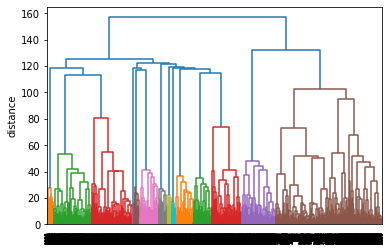

In [369]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# 계층적 클러스터링
hierarchy = linkage(bank_data_standard, metric="euclidean", method="ward")
dendrogram(hierarchy)

plt.ylabel("distance")
plt.show()

In [372]:
from scipy.cluster.hierarchy import fcluster


# 고객별로 클러스터 ID를 부여
customer_group = fcluster(hierarchy, 100, "distance")

# ID 확인
print(customer_group)

[14 14 14 ... 12 12 12]


#### 비계층적 클러스터링

In [373]:
from sklearn.cluster import KMeans


# 고객을 10개 군집(그룹)으로 분할
cluster = KMeans(10)
customer_group = cluster.fit_predict(bank_data_standard)

print(customer_group)

[0 0 0 ... 1 1 1]


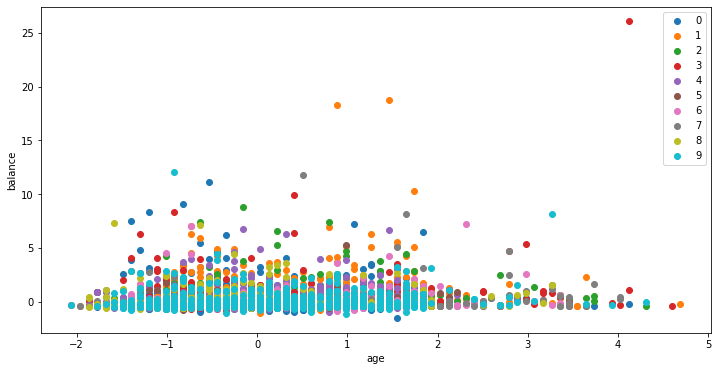

In [375]:
# 고객의 클러스터 ID마다 색을 부여하여 산포도 그래프를 작성
plt.figure(figsize=(12, 6))

for i in range(10):
    template = bank_data_standard[customer_group == i]
    plt.scatter(template["age"], template["balance"], label=i)

plt.legend()
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

In [383]:
# Z변환한 데이터셋에 클러스터 ID를 새로운 열 group에 저장
bank_data_standard["group"] = customer_group
bank_data_standard.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0


In [384]:
# 클러스터화된 데이터의 그룹별 건수를 확인
bank_data_standard["group"].value_counts()

0    1710
9    1092
2     911
4     746
1     706
3     509
8     486
6     461
5     188
7     124
Name: group, dtype: int64

In [386]:
# 클러스터 ID가 7인 데이터의 통계량 확인
bank_data_standard[bank_data_standard["group"] == 7].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,124.0
mean,0.678904,-1.371485e-01,0.344301,-0.750174,-0.205552,0.164835,0.283332,-0.387322,0.518089,0.691883,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,7.410215e+00,-1.120725e-01,7.0
std,1.615764,3.622863e-16,1.549163,0.800241,0.769093,0.991199,1.501713,0.271858,1.325311,1.776183,...,6.130998e-16,2.508136e-16,5.016271e-16,7.245725e-16,1.950772e-16,2.229454e-16,7.245725e-16,1.070138e-14,2.090113e-16,0.0
min,-1.964393,-1.371485e-01,-0.448827,-1.140627,-0.444540,-1.758049,-0.960790,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,7.410215e+00,-1.120725e-01,7.0
25%,-0.633545,-1.371485e-01,-0.385590,-1.140627,-0.444540,-0.430714,-0.495815,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,7.410215e+00,-1.120725e-01,7.0
50%,0.222000,-1.371485e-01,-0.096167,-1.140627,-0.444540,0.051953,-0.185521,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,7.410215e+00,-1.120725e-01,7.0
75%,2.028150,-1.371485e-01,0.412016,-1.140627,-0.444540,0.926788,0.408976,-0.238367,1.409163,1.317606,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,7.410215e+00,-1.120725e-01,7.0
max,4.024421,-1.371485e-01,11.750828,0.876711,2.249514,1.741289,11.260878,0.433285,7.706127,10.541555,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,7.410215e+00,-1.120725e-01,7.0


### 4-3. 잠재적인 요구(니즈)의 추출
#### 주성분 분석

In [392]:
from sklearn.decomposition import PCA


# 군집화에 사용된 열(group) 삭제
bank_data_standard.drop("group", axis=1, inplace=True)

# 주성분을 누적기여율 80%까지 추출
pca = PCA(0.80)
bank_data_pca = pca.fit_transform(bank_data_standard)

# 주성분 확인
print(pca.n_components_)
# PCA로 차원 압축한 데이터셋의 차원 확인
print(bank_data_pca.shape)

18
(6933, 18)


In [397]:
# 앞에서 삭제한 목적변수(y)만 다시 불러오기
y = pd.read_csv("data/bank_prep.csv")["y"]

# 데이터셋에 목적변수(y)를 추가
bank_data_pca = pd.DataFrame(bank_data_pca)
bank_data_pca["y"] = y

print(bank_data_pca.shape)
bank_data_pca.head()

(6933, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y
0,-2.159720,-0.953533,0.364464,-1.969631,-1.036262,-0.636522,-0.059006,-0.396160,-0.900198,-0.804364,0.539746,1.083198,-0.450325,0.399417,-0.198408,0.094810,-0.579979,0.049432,0
1,-2.659799,2.392785,-0.345411,0.434298,0.436614,-0.214727,-0.604287,0.444243,-0.374383,-0.436378,0.281744,0.508454,-0.193340,-0.505405,0.090340,-0.008324,0.207025,-0.119232,0
2,-2.893231,0.983210,0.852221,0.180684,-0.245061,-1.344450,0.355483,0.053876,-0.361479,-0.658782,-0.150353,0.880550,-0.099310,-0.027574,0.130751,0.116947,-0.154344,0.026836,0
3,-2.334818,-0.360168,0.933153,-0.248877,1.010558,-0.350980,0.680035,-0.094591,-0.900093,-0.282359,-1.706592,3.517033,-1.012189,-1.197925,0.332767,0.678580,-0.411178,0.998017,0
4,-2.689581,2.842882,-0.573860,0.565040,0.205188,-0.519930,-0.662849,0.592710,-0.209320,-0.451635,0.519897,0.116464,0.003088,-0.341208,0.086465,-0.088402,0.296363,-0.266041,0


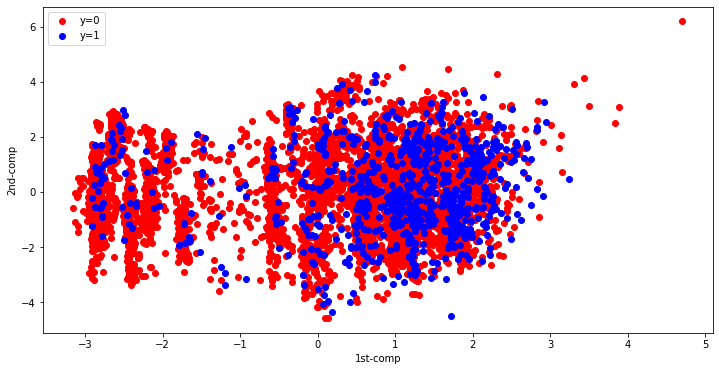

In [411]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

# y = 0인 데이터의 제 1주성분과 제 2주성분
bank_data_pca_0 = bank_data_pca[bank_data_pca["y"] == 0]
bank_data_pca_0 = bank_data_pca_0.drop("y", axis=1)
plt.scatter(bank_data_pca_0[0], bank_data_pca_0[1], c="red", label="y=0")
# y = 1인 데이터의 제 1주성분과 제 2주성분
bank_data_pca_1 = bank_data_pca[bank_data_pca["y"] == 1]
bank_data_pca_1 = bank_data_pca_1.drop("y", axis=1)
plt.scatter(bank_data_pca_1[0], bank_data_pca_1[1], c="blue", label="y=1")

plt.legend()
plt.xlabel("1st-comp")
plt.ylabel("2nd-comp")
plt.show()

### 5-2. 머신러닝을 위한 데이터 준비(5-1은 패스)
#### 데이터셋 작성하기

In [47]:
import glob
import cv2
import numpy as np


dirs = ["ants", "bees"]

pixels = []  # 설명변수
labels = []  # 목적변수

for i, d in enumerate(dirs):
    files = glob.glob("data/images/" + d + "/*")
    # print(d)
    # print(files)
    for file in files:
        # print(file)
        # 이미지를 그레이스케일로 불러오기
        image = cv2.imread(file, 0)
        if image is None:
            print("Image load failed !")
        # 이미지 크기 균일화
        image = cv2.resize(image, (128, 128))
        # 설명변수 리스트에 이미지 덧붙이기
        image = image.flatten().tolist()
        pixels.append(image)
        # 목적변수 리스트에 이미지 레이블 덧붙이기
        labels.append(i)

In [50]:
import pandas as pd


pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df / 255.

labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns={0:"label"})

image_set = pd.concat([pixels_df, labels_df], axis=1)
image_set.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.580392,0.560784,0.564706,0.498039,0.505882,0.556863,0.556863,0.549020,0.560784,0.627451,...,0.156863,0.168627,0.160784,0.156863,0.152941,0.141176,0.145098,0.129412,0.137255,0
1,0.321569,0.321569,0.321569,0.301961,0.294118,0.301961,0.317647,0.305882,0.294118,0.278431,...,0.486275,0.474510,0.462745,0.447059,0.427451,0.411765,0.384314,0.364706,0.345098,0
2,0.152941,0.149020,0.145098,0.141176,0.141176,0.145098,0.152941,0.160784,0.172549,0.184314,...,0.203922,0.196078,0.176471,0.168627,0.160784,0.149020,0.141176,0.141176,0.137255,0
3,0.749020,0.745098,0.729412,0.737255,0.737255,0.737255,0.729412,0.721569,0.721569,0.729412,...,0.505882,0.317647,0.309804,0.615686,0.556863,0.627451,0.490196,0.396078,0.450980,0
4,0.015686,0.035294,0.007843,0.003922,0.027451,0.023529,0.015686,0.019608,0.019608,0.019608,...,0.125490,0.129412,0.129412,0.129412,0.129412,0.133333,0.113725,0.137255,0.090196,0


In [56]:
# 컬러 영상의 설명변수와 목적변수 세트를 작성
pixels2 = []  # 설명변수
labels2 = []  # 목적변수
template = []

for i, d in enumerate(dirs):
    files = glob.glob("data/images/" + d + "/*")
    # print(d)
    # print(files)
    for file in files:
        # print(file)
        # 이미지를 그레이스케일로 불러오기
        image = cv2.imread(file)
        if image is None:
            print("Image load failed !")
        # 이미지 크기 균일화
        image = cv2.resize(image, (128, 128))
        # B, G, R 평면으로 분리
        B, G, R = cv2.split(image)
        # 설명변수 리스트에 이미지 덧붙이기
        B = B.flatten().tolist()
        G = G.flatten().tolist()
        R = R.flatten().tolist()
        template = B + G + R
        pixels2.append(template)
        # 목적변수 리스트에 이미지 레이블 덧붙이기
        labels2.append(i)

pixels2_df = pd.DataFrame(pixels2)
pixels2_df = pixels2_df / 255.

labels2_df = pd.DataFrame(labels2)
labels2_df = labels2_df.rename(columns={0:"label"})

image_set2 = pd.concat([pixels2_df, labels2_df], axis=1)
image_set2.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0.007843,0.000000,0.000000,0.000000,0.003922,0.007843,0.007843,0.000000,0.000000,0.011765,...,0.098039,0.090196,0.109804,0.105882,0.098039,0.082353,0.086275,0.074510,0.094118,0
1,0.364706,0.364706,0.368627,0.345098,0.333333,0.337255,0.356863,0.341176,0.329412,0.313725,...,0.227451,0.219608,0.203922,0.196078,0.180392,0.176471,0.164706,0.152941,0.145098,0
2,0.078431,0.066667,0.050980,0.043137,0.050980,0.050980,0.050980,0.062745,0.074510,0.090196,...,0.149020,0.141176,0.129412,0.113725,0.105882,0.094118,0.082353,0.090196,0.090196,0
3,0.650980,0.647059,0.631373,0.639216,0.650980,0.647059,0.631373,0.623529,0.615686,0.631373,...,0.568627,0.396078,0.423529,0.698039,0.658824,0.725490,0.560784,0.505882,0.490196,0
4,0.117647,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,...,0.098039,0.101961,0.101961,0.101961,0.101961,0.090196,0.082353,0.105882,0.070588,0


#### 모폴로지 변환

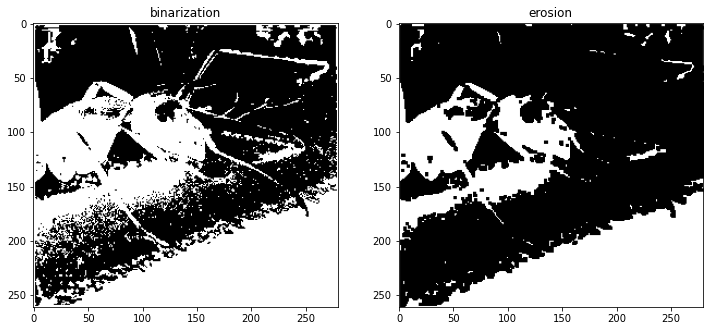

In [61]:
import matplotlib.pyplot as plt


# binarization(이진화)
source = cv2.imread("data/images/ants/swiss-army-ant.jpg", 0)
T, binary = cv2.threshold(source, 128, 255, cv2.THRESH_BINARY_INV)

# erode(침식)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst_erosion = cv2.erode(binary, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(121, title="binarization")
plt.imshow(binary, cmap="gray")
plt.subplot(122, title="erosion")
plt.imshow(dst_erosion, cmap="gray")
plt.show()

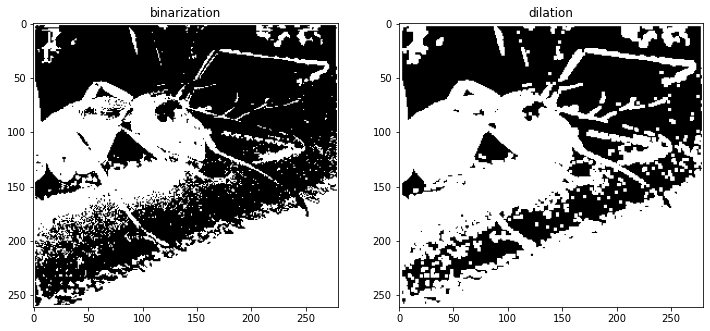

In [63]:
# dilate(팽창)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst_dilation = cv2.dilate(binary, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(121, title="binarization")
plt.imshow(binary, cmap="gray")
plt.subplot(122, title="dilation")
plt.imshow(dst_dilation, cmap="gray")
plt.show()

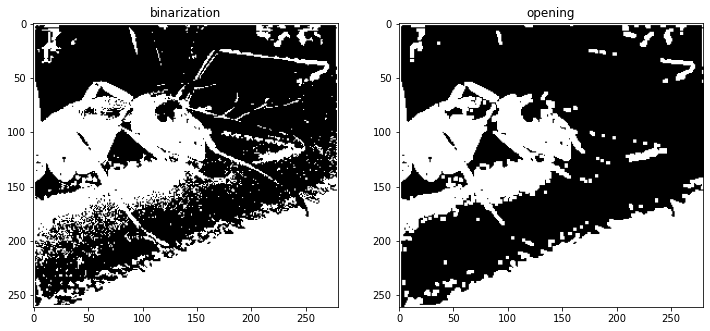

In [68]:
# opening(열기)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst_opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(121, title="binarization")
plt.imshow(binary, cmap="gray")
plt.subplot(122, title="opening")
plt.imshow(dst_open, cmap="gray")
plt.show()

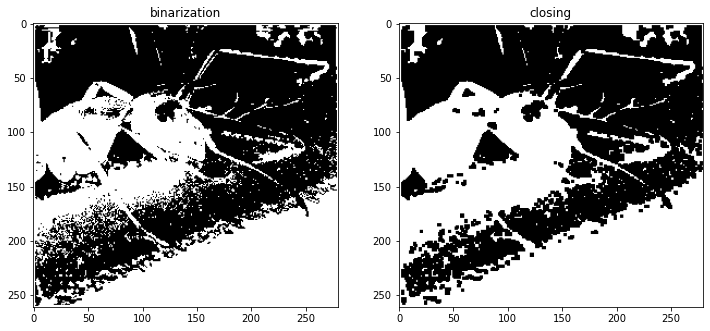

In [69]:
# closing(닫기)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst_closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(121, title="binarization")
plt.imshow(binary, cmap="gray")
plt.subplot(122, title="closing")
plt.imshow(dst_closing, cmap="gray")
plt.show()

#### 히스토그램 작성

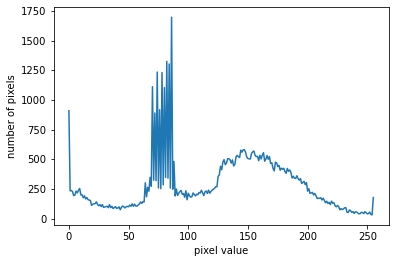

In [85]:
# 그레이스케일 영상에 대한 히스토그램 작성
source = cv2.imread("data/images/ants/swiss-army-ant.jpg", 0)
hist = cv2.calcHist([source], [0], None, [256], [0, 256])

# plt.xlim(0, 255)
plt.plot(hist)
plt.xlabel("pixel value")
plt.ylabel("number of pixels")
plt.show()

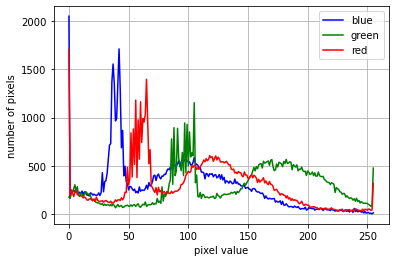

In [83]:
# 컬러 영상에 대한 히스토그램 작성
source = cv2.imread("data/images/ants/swiss-army-ant.jpg")
planes = cv2.split(source)

# plt.xlim(0, 255)
for plane, color in zip(planes, ["blue", "green", "red"]):
    hist = cv2.calcHist([plane], [0], None, [256], [0, 256])
    plt.plot(hist, color[0], label=color)
plt.xlabel("pixel value")
plt.ylabel("number of pixels")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### PCA에 의한 차원압축
from sklearn.decomposition import PCA


pca = PCA(0.8)